# Задачи

1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
2. Какой клиент совершил больше всего успешных операций? (success == True)
3. С какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиумные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
6. Постройте график распределения числа успешных операций
7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
      
Описание данных

user_data:
1. client – идентификатор пользователя
2. premium – является ли клиент премиум
3. age – возраст

logs:
1. client – идентификатор пользователя
2. success – результат (успех - 1, нет - 0)
3. platform – платформа
4. time – время в формате Unix

# Задача 1

1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [94]:
# импортируем библиотеку
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [95]:
# загружаем два датасета. Указываем систему кодирования и знак-разделитель - запятую 
user_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-itaev-23/mini_project_2/3_user_data.csv', 
                 encoding='windows-1251', sep=',')
logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-itaev-23/mini_project_2/3_logs.csv', 
                 encoding='windows-1251', sep=',')

In [96]:
# проверяем размер таблицы, типы переменных, описательную статистику. 
user_data.info()
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


# Задача 2

2. Какой клиент совершил больше всего успешных операций? (success == True)

In [97]:
# рассчитываем количество действий по каждому клиенту, сортируем в порядке убывания, переименовываем колонку с новыми значениями
logs_new = logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'time': 'count'}) \
    .sort_values('time',ascending=False) \
    .rename(columns={'time': 'action_counts'})
logs_new

,client,action_counts
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [98]:
# выявляем максимальное количество действий по клиентам
max_action = logs_new.action_counts.max()
max_action

41

In [99]:
# узнали, что максимальное число действий 41, отбираем всех с данным значением, сортируем по возрастанию ID клиента
max_action_users = logs_new.query('action_counts == 41') \
    .sort_values('client',ascending=True) 
max_action_users

,client,action_counts
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


In [100]:
# записываем полученные данные клиентов в список. Также есть немного другой способ это сделать:
# max_action_users.client.head(10).to_list()
max_action_users.client.unique()

array([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584])

# Задача 3

3. С какой платформы осуществляется наибольшее количество успешных операций?

In [101]:
#отфильтровали по успешным операциям
#сгруппировали по платформам и посчитали количество успешных операций
#отсортировали по убыванию 
#переименовали колонку со значениями 
success_platform = logs.query('success == True') \
    .groupby('platform', as_index=False) \
    .agg({'time': 'count'}) \
    .sort_values('time',ascending=False) \
    .rename(columns={'time': 'action_counts'})
success_platform

,platform,action_counts
1,phone,2019
0,computer,1090
2,tablet,180


# Задача 4

4. Какую платформу предпочитают премиумные клиенты?

In [102]:
# количество клиентов по базе user_data
user_data.client.nunique()

2954

In [103]:
# количество клиентов по базе logs
logs.client.nunique()

4011

In [104]:
# объединяем данные двух таблиц по значениям столбаца client
general_data = logs.merge(user_data, on='client')
general_data.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [105]:
# Из общей таблицы отбираем премиальных клиентов, 
# группируем их по платформам, считаем количество действий, сортируем по убыванию
general_data.query('premium == True') \
    .groupby('platform', as_index=False) \
    .agg({'time': 'count'}) \
    .sort_values('time', ascending=False) \
    .rename(columns={'time': 'action_counts'})

,platform,action_counts
1,phone,246
0,computer,150
2,tablet,24


# Задача 5

5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [106]:
# переходим к визуализации данных распределения возрастов по платформам

In [107]:
# Формируем таблицу премиальных клиентов и непремиальных клиентов
premium_True = general_data.query('premium == True')
premium_False = general_data.query('premium == False')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


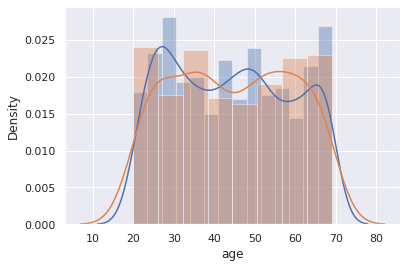

In [108]:
# построили распределение премиальных и непремиальных клиентов в зависимости от возраста
fig, ax = plt.subplots()
sns.distplot(premium_False.age, ax=ax)
sns.distplot(premium_True.age, ax=ax)

# Задача 6

6. Постройте график распределения числа успешных операций

In [109]:
# сформировали таблицу с успешными операциями
# сгруппировали по клиентам
# посчитали количество операций
# убрали индексы
success_counts_users = logs.query('success == True') \
                            .groupby('client') \
                            .agg({'success': 'count'}) \
                            .reset_index()
success_counts_users

,client,success
0,40,1
1,50,1
2,75,1
3,81,1
4,132,1
...,...,...
2840,99926,1
2841,99927,1
2842,99931,1
2843,99973,1


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


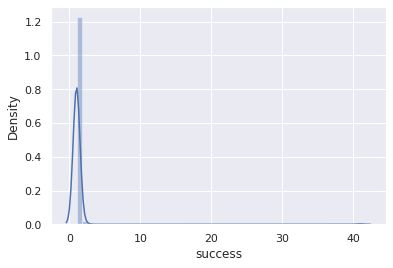

In [110]:
# визуализировали распределение успешных операций
sns.distplot(success_counts_users.success)

# Задача 7

7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [111]:
# проверим решение двумя способами
# сначала решим через агрегирование данных таблицы
# а затем визуализируем сырые данные через sns.countplot

In [112]:
# отфильтровали таблицу по платформе computer и успешным операциям success == True
# сгруппирвали по возрасту
# посчитали количество успешных опеарций по возрасту
# отсортировали по убыванию операций
# переименовали колонку
data_age_platform = general_data.query('platform == "computer" and success == True') \
            .groupby('age') \
            .agg({'client': 'count'}) \
            .reset_index() \
            .sort_values('client', ascending=False) \
            .rename(columns={'client': 'count_success'})
data_age_platform.head()

,age,count_success
8,28,49
29,49,33
5,25,33
12,32,27
48,68,26


In [113]:
# создали таблицу для визуализации данных в графике sns.countplot
# отфильтровали таблицу по платформе computer и успешным операциям success == True
data_age_computer = general_data.query('platform == "computer" and success == True')
data_age_computer.head()

,client,success,platform,time,premium,age
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
7,61468,True,computer,1585416826,False,25
11,61468,True,computer,1585428874,False,25


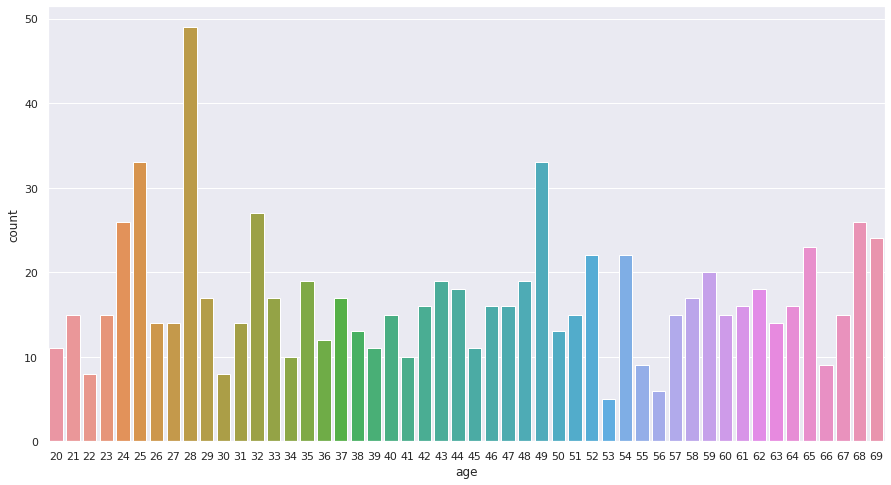

In [114]:
# визуализировали данные
plt.figure(figsize=(15, 8))
sns.countplot(x="age", data=data_age_computer)